In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from IPython.display import clear_output
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model
#a remove :[8, 10, 12, 13, 22, 96, 117, 126, 136, 137]

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [2]:
variables = pickle.load(open(r'jeu_variables_2.pkl','rb'))
entetes = np.array(variables['X']).reshape(72,141)[:,0]
X = np.array(variables['X']).reshape(72,141)[:,1:141].T.astype('float')
Y = np.array(variables['Y']).reshape(140).astype('float')
remove_bat = [8, 10, 12, 13, 22, 96, 117, 126, 136, 137]
X_clean = np.delete(X, remove_bat, 0)
Y_clean = np.delete(Y, remove_bat)
X = X_clean
Y = Y_clean

In [3]:
index_valeurs_faibles = np.where(Y < 350)
index_valeurs_fortes = np.where(Y > 1350)
index_a_enlever = np.concatenate((index_valeurs_faibles, index_valeurs_fortes), axis=None)
X = np.delete(X, index_a_enlever, 0)
Y = np.delete(Y, index_a_enlever)

In [4]:
print(X.shape)
print(Y.shape)
Y_stratify = Y//330
print(Y)
print(Y_stratify)
print(np.unique(Y_stratify, return_counts=True))

(121, 72)
(121,)
[1190. 1179. 1177. 1226. 1227. 1074.  636.  870. 1054.  788.  880.  719.
  862.  857.  691.  788.  534.  559. 1014. 1017.  854.  870.  842.  860.
  917.  709.  876.  731.  757.  742.  703.  704.  648.  617.  625.  966.
 1051.  702.  651.  616.  599.  438.  444.  480.  511.  663.  982. 1061.
  561.  477.  458.  483.  485.  483.  494.  487.  461.  502.  489.  513.
  527.  495.  461.  471.  468.  509.  498.  481.  492.  519.  520.  499.
  463.  535.  478.  465.  459.  499.  429.  466.  462.  457.  487.  429.
  713. 1009. 1063. 1115. 1048.  828.  667.  828. 1039. 1078.  817.  932.
  816.  858.  876. 1315. 1146. 1155.  813.  772. 1002.  825.  989. 1028.
  850.  541.  858.  935.  731. 1284. 1158. 1093.  923. 1156.  796.  786.
  940.]
[3. 3. 3. 3. 3. 3. 1. 2. 3. 2. 2. 2. 2. 2. 2. 2. 1. 1. 3. 3. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y_stratify)
Y_train_stratify = Y_train//330
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, shuffle=True, test_size=1/2, stratify=Y_train_stratify)

normalisation des données

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(X_train)
X_train_n = sc.transform(X_train)
X_val_n = sc.transform(X_val)
X_test_n = sc.transform(X_test)

scy = StandardScaler(with_mean=True, with_std=True)
scy = sc.fit(Y_train.reshape(-1, 1))
Y_train_n = sc.transform(Y_train.reshape(-1, 1))
Y_val_n = sc.transform(Y_val.reshape(-1, 1))
Y_test_n = sc.transform(Y_test.reshape(-1, 1))

selection des 10 variables les plus importantes

In [7]:
import pandas as pd
from sklearn.linear_model import Lasso
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = entetes
    trouve = False
    alphaOpti = 0
    index_var = []
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train_n, Y_train_n)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        print(column_name)
        print(entetes[np.where(df[column_name] > 0.001)])
        print("ok ",np.where(df[column_name] > 0.001)[0].shape[0])
        if(np.where(df[column_name] > 0.001)[0].shape[0] <= 10 and not trouve):
            alphaOpti = alpha
            trouve = True
            index_var = np.where(df[column_name] > 0.001)
            
        
    # Return the datafram    
    return df, alphaOpti, index_var

tableau, alphaOpti, index_var = lasso(np.logspace(-4,0,20))

print(alphaOpti)
print(index_var)
print(entetes[index_var])

Alpha = 0.000100
['I mean 100' 'Qc mean 100' 'Qdlin mean 100' 'T mean 100' 'Tdlin mean 100'
 'Qc mean 150' 'T mean 150' 'dQdV mean 150' 'I 100-10' 'Qc 100-10'
 'T 100-10' 'dQdV 100-10' 'Qc 150-10' 'Qd 150-10' 'T 150-10' 'dQdV 150-10'
 't 150-10' 'I 150-100' 'T 150-100' 'Qc var 50' 'Qdlin var 50' 'T var 50'
 'V var 50' 't var 50' 'Qdlin var 100' 'dQdV var 100' 't var 100'
 'I var 150' 'Qd var 150' 'dQdV var 150' 't var 150']
ok  31
Alpha = 0.000162
['I mean 100' 'Qc mean 100' 'T mean 100' 't mean 100' 'Qc mean 150'
 'Qd mean 150' 'T mean 150' 'dQdV mean 150' 't mean 150' 'I 100-10'
 'Qc 100-10' 'T 100-10' 'dQdV 100-10' 'Qc 150-10' 'Qd 150-10' 'T 150-10'
 'dQdV 150-10' 't 150-10' 'I 150-100' 'T 150-100' 'Qc var 50'
 'Qdlin var 50' 'T var 50' 'V var 50' 't var 50' 'Qdlin var 100'
 'dQdV var 100' 'I var 150' 'Qd var 150' 'dQdV var 150' 't var 150']
ok  31
Alpha = 0.000264
['I mean 100' 'Qc mean 100' 'T mean 100' 'Qc mean 150' 'Qd mean 150'
 'T mean 150' 'dQdV mean 150' 't mean 150' 'I 100-

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.905e-02, tolerance: 4.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.662e-02, tolerance: 4.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWa

In [15]:
index = index_var[0]
X_10_train_n = X_train_n[:, index]
X_10_train = X_train[:, index]
X_10_test_n = X_test_n[:, index]
X_10_test = X_test[:, index]
X_10_val_n = X_val_n[:, index]
X_10_val = X_val[:, index]

In [ ]:
#SVR rbf normalise

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVR
clfker = SVR(kernel="rbf")
vectC = np.logspace(-1, 2, 10)
vectGamma = np.logspace(1, 2, 10)
err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
for ind_C, C in enumerate(vectC):
    clfker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        clfker.gamma = paramKer
        clfker.fit(X_10_train_n, Y_train_n)
        err_val[ind_C, ind_gam]= RMSE(Y_val_n, clfker.predict(X_10_val_n))
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print(f"Copt : {Copt} , GammaOpt :  {GammaOpt}")
clfker = SVR(kernel="rbf")
clfker.C = Copt
clfker.gamma = GammaOpt
clfker.fit(X_10_train_n, Y_train_n)
prediction_Y_test_n = clfker.predict(X_10_test_n)
prediction_Y_train_n = clfker.predict(X_10_train_n)
prediction_Y_val_n = clfker.predict(X_10_val_n)

#denormalisation
prediction_Y_test = scy.inverse_transform(prediction_Y_test_n.reshape(-1,1))
prediction_Y_train = scy.inverse_transform(prediction_Y_train_n.reshape(-1,1))
prediction_Y_val = scy.inverse_transform(prediction_Y_val_n.reshape(-1,1))

print(prediction_Y_test.flatten())

# Erreur d'entrainement
print('Train - RMSE=',RMSE(prediction_Y_train,Y_train))
print('Train - MAPE=',MAPE(prediction_Y_train,Y_train))
    
# Erreur de test
print('Test - RMSE=',RMSE(prediction_Y_test,Y_test))
print('Test - MAPE=',MAPE(prediction_Y_test,Y_test))

Copt : 0.21544346900318834 , GammaOpt :  100.0
[739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617 739.57993617 739.57993617 739.57993617 739.57993617
 739.57993617]
Train - RMSE= 236.47963444614234
Train - MAPE= 27.567907343824515
Test - RMSE= 255.88323331325748
Test - MAPE= 33.85549915239246


/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/li

In [ ]:
#SVR rbf 

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVR
clfker = SVR(kernel="rbf")
vectC = np.logspace(-1, 2, 10)
vectGamma = np.logspace(1, 2, 10)
err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
for ind_C, C in enumerate(vectC):
    clfker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        clfker.gamma = paramKer
        clfker.fit(X_10_train, Y_train)
        err_val[ind_C, ind_gam]= RMSE(Y_val, clfker.predict(X_10_val))
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print(f"Copt : {Copt} , GammaOpt :  {GammaOpt}")
clfker = SVR(kernel="rbf")
clfker.C = Copt
clfker.gamma = GammaOpt
clfker.fit(X_10_train, Y_train)
prediction_Y_test = clfker.predict(X_10_test)
prediction_Y_train = clfker.predict(X_10_train)
prediction_Y_val = clfker.predict(X_10_val)

#denormalisation

print(prediction_Y_test.flatten())

# Erreur d'entrainement
print('Train - RMSE=',RMSE(prediction_Y_train,Y_train))
print('Train - MAPE=',MAPE(prediction_Y_train,Y_train))
    
# Erreur de test
print('Test - RMSE=',RMSE(prediction_Y_test,Y_test))
print('Test - MAPE=',MAPE(prediction_Y_test,Y_test))

Copt : 100.0 , GammaOpt :  10.0
[760.41196789 737.44317792 730.70287854 818.75096747 753.40784251
 700.67916559 706.90737613 719.35143158 730.74695459 730.75035545
 773.73520386 733.11198395 740.49292913 730.70287843 730.70290108
 772.87416612 710.51309756 730.70287673 731.94114378 735.58159548
 753.19296874 754.95057427 730.70287634 730.01263429 730.70614083
 731.29322613 704.66223721 798.27380864 660.90140723 834.79676963
 730.88403001 722.09628128 730.70469882 730.65096022 732.00491615
 714.22384816 708.54995237 742.94139501 734.77079736 773.0994471
 731.16131934]
Train - RMSE= 150.6377733974801
Train - MAPE= 14.390701151309196
Test - RMSE= 250.37510670385714
Test - MAPE= 32.17342548120981


In [ ]:
#SVR poly

In [27]:
vect_deg = np.array([1,2,3,4,5,6,7])
err_val = np.empty((vect_deg.shape))
for ind_deg, deg in enumerate(vect_deg):
    clfker = SVR(kernel="poly", gamma="scale" , coef0=1)
    clfker.degree = deg
    clfker.fit(X_10_train, Y_train)
    err_val[ind_deg]= RMSE(Y_val, clfker.predict(X_10_val))

degOpt = vect_deg[np.argmin(err_val)]


clfker = SVR(kernel="poly", gamma="scale" , coef0=1) # SVM with rbf kernel
# set parameters gamma and C
clfker.degree = degOpt
clfker.fit(X_10_train, Y_train)
prediction_Y_test = clfker.predict(X_10_test)
prediction_Y_train = clfker.predict(X_10_train)
prediction_Y_val = clfker.predict(X_10_val)
#calcul erreur
# Erreur d'entrainement
print('Train - RMSE=',RMSE(prediction_Y_train,Y_train))
print('Train - MAPE=',MAPE(prediction_Y_train,Y_train))
    
# Erreur de test
print('Test - RMSE=',RMSE(prediction_Y_test,Y_test))
print('Test - MAPE=',MAPE(prediction_Y_test,Y_test))

print(prediction_Y_test)

Train - RMSE= 227.44724454390726
Train - MAPE= 26.27684528783839
Test - RMSE= 244.52106213900842
Test - MAPE= 33.13389730833079
[734.8587109  805.6734443  807.47819821 757.84291887 736.41490923
 745.82309819 759.87799758 759.08755926 754.83560327 753.36830405
 752.1172836  822.86295343 767.31684197 654.21493608 813.74948212
 753.29895536 763.88587442 727.90889428 744.12723817 759.39131779
 818.54385732 810.89862302 723.88124925 752.79731772 730.46361229
 794.82680946 763.23366714 743.40197655 735.63432404 753.61068748
 711.51300613 758.14638597 802.14259925 759.51100781 751.60312935
 743.01836183 745.65856768 754.59795927 743.95097272 794.34863855
 727.42922756]


In [ ]:
#linear logistic

Train - RMSE= 227.44724454390726
Train - MAPE= 26.27684528783839
Test - RMSE= 244.52106213900842
Test - MAPE= 33.13389730833079
[734.8587109  805.6734443  807.47819821 757.84291887 736.41490923
 745.82309819 759.87799758 759.08755926 754.83560327 753.36830405
 752.1172836  822.86295343 767.31684197 654.21493608 813.74948212
 753.29895536 763.88587442 727.90889428 744.12723817 759.39131779
 818.54385732 810.89862302 723.88124925 752.79731772 730.46361229
 794.82680946 763.23366714 743.40197655 735.63432404 753.61068748
 711.51300613 758.14638597 802.14259925 759.51100781 751.60312935
 743.01836183 745.65856768 754.59795927 743.95097272 794.34863855
 727.42922756]
[ 870. 1146.  850.  828.  704.  616.  535. 1017.  477.  499.  485. 1115.
  854.  511.  541.  520.  463.  438.  444.  932.  923. 1093.  461.  429.
  663.  772.  702.  935.  478.  880.  876.  519. 1315.  458.  466.  862.
  917. 1051. 1054. 1063. 1190.]


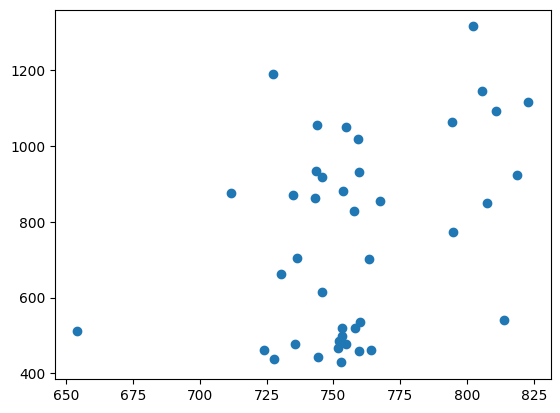

In [30]:
# Modèle linéaire regression logistique
from sklearn import linear_model
clf = linear_model.LogisticRegression(penalty="none", solver="newton-cg")
clf.fit(X_10_train, Y_train)
    
mean_prediction_train = clf.predict(X_10_train)
mean_prediction_test = clf.predict(X_10_test)

print('Train - RMSE=',RMSE(prediction_Y_train,Y_train))
print('Train - MAPE=',MAPE(prediction_Y_train,Y_train))
    
# Erreur de test
print('Test - RMSE=',RMSE(prediction_Y_test,Y_test))
print('Test - MAPE=',MAPE(prediction_Y_test,Y_test))

print(prediction_Y_test)
print(Y_test)

plt.scatter(prediction_Y_test, Y_test)

In [ ]:
#gaussian machin

RMSE test normalisé : 250.7251419106398


/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


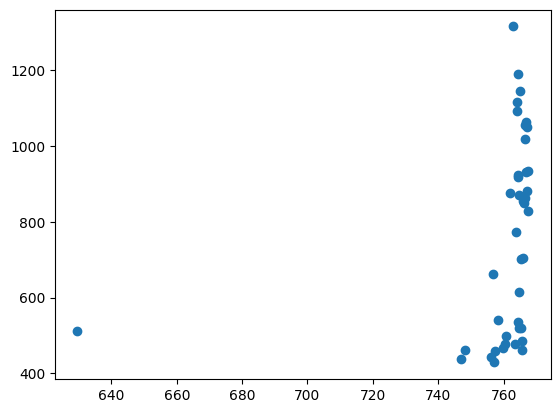

In [32]:
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

irregularities_kernel = 5.0**2 * RationalQuadratic(length_scale=5.0, alpha=1.0)
long_term_trend_kernel = 2.0**2 * RBF(length_scale=2.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
kernel_gpr = irregularities_kernel + long_term_trend_kernel + noise_kernel

gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel_gpr, n_restarts_optimizer=10)
gpr.fit(X_10_train, Y_train)
Y_predict = gpr.predict(X_10_test)
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
plt.scatter(Y_predict, Y_test)